In [1]:
!git clone https://github.com/deyvanloxefal/sentiment-getcontact.git

Cloning into 'sentiment-getcontact'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 71 (delta 19), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (71/71), 7.03 MiB | 3.07 MiB/s, done.
Resolving deltas: 100% (19/19), done.


# Preprocessing Data


## Import data

In [2]:
import pandas as pd

df = pd.read_csv('/content/sentiment-getcontact/data/Ulasan Getcontact.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              50000 non-null  object
 1   userName              50000 non-null  object
 2   userImage             50000 non-null  object
 3   content               50000 non-null  object
 4   score                 50000 non-null  int64 
 5   thumbsUpCount         50000 non-null  int64 
 6   reviewCreatedVersion  35522 non-null  object
 7   at                    50000 non-null  object
 8   replyContent          24999 non-null  object
 9   repliedAt             24999 non-null  object
 10  appVersion            35522 non-null  object
dtypes: int64(2), object(9)
memory usage: 4.2+ MB


In [3]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,9fef6bfa-c989-45ad-ae13-908ac6ee279b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sangat kurang dikarenakan tidak bisa berhenti ...,1,361,7.4.0,2025-01-07 23:54:26,"Halo, Terima kasih telah menghubungi kami. Kam...",2025-01-08 08:54:04,7.4.0
1,9cdd645c-b934-4d22-abd0-32341313606d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sebenarnya sangat membantu tetapi sekarang fit...,2,232,7.4.0,2025-01-02 19:42:53,"Hai,\nKami telah menerima umpan balik Anda dan...",2025-01-02 14:32:33,7.4.0
2,1253e9cc-5398-44ca-9b2c-b752511f6f40,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Duh sayang banget sekarang setiap fiturnya har...,1,2815,7.4.0,2024-12-24 07:28:56,Tim Getcontact mengucapkan terima kasih atas k...,2024-12-24 09:09:51,7.4.0
3,def61f04-752f-49a8-b476-9037a868c12b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sayang banget harus bayar premium per-bulannya...,1,311,7.4.0,2024-12-27 12:04:06,"Halo,\nTim Getcontact telah saran dari Anda da...",2024-12-28 17:02:08,7.4.0
4,2004649f-1c80-411a-a7b7-14fabfe267d7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sebenernya sangat membantu ini aplikasi, tapi ...",1,74,7.5.0,2025-01-18 10:45:40,"Halo, Silahkan lengkapi formulir berikut dan s...",2025-01-18 16:22:08,7.5.0


In [5]:
df = df[["content"]]
df.head()

,content
0,Sangat kurang dikarenakan tidak bisa berhenti ...
1,sebenarnya sangat membantu tetapi sekarang fit...
2,Duh sayang banget sekarang setiap fiturnya har...
3,Sayang banget harus bayar premium per-bulannya...
4,"Sebenernya sangat membantu ini aplikasi, tapi ..."


## Hapus duplikat

In [6]:
df.drop_duplicates(subset="content", keep="first", inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49628 entries, 0 to 49999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  49628 non-null  object
dtypes: object(1)
memory usage: 775.4+ KB


## WordCloud before Preprocessing

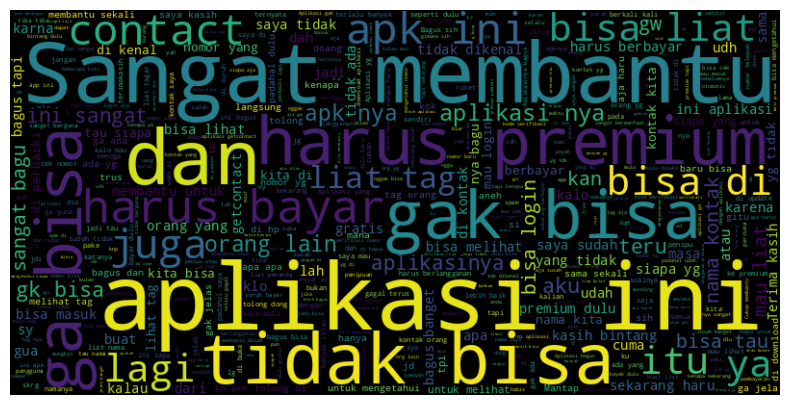

In [8]:
# Membuat wordcloud
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Mengisi nilai NaN dengan string kosong ('')
df['content'] = df['content'].fillna('')

# Menggabungkan teks dari kolom 'Review Text'
text = ' '.join(df['content'].astype(str).tolist())

stopwords = set(STOPWORDS)

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Proses Cleaning

In [10]:
import re
import string
import nltk

# Fungsi untuk menghapus emoji
def remove_emoji(data):
    if data is not None and isinstance(data, str):
        emoji_pattern = re.compile(
            "["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            u"\U0001FB00-\U0001FBFF"  # Additional emoticons
            u"\U0001F1E0-\U0001F1FF"  # flags
            "]+", flags=re.UNICODE
        )
        return emoji_pattern.sub(r'', data)
    else:
        return data

# Fungsi untuk menghapus simbol
def remove_symbols(data):
    if data is not None and isinstance(data, str):
        data = re.sub(r'[^a-zA-Z0-9\s]', '', data)
    return data

# Fungsi untuk menghapus angka
def remove_numbers(data):
    if data is not None and isinstance(data, str):
        data = re.sub(r'\d+', '', data)
    return data

# Proses pembersihan df pada kolom 'Review Text'
df['cleaning'] = df['content'].apply(lambda x: remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_numbers(x))

# Menampilkan 10 baris pertama dari dfFrame
df.head()

,content,cleaning
0,Sangat kurang dikarenakan tidak bisa berhenti ...,Sangat kurang dikarenakan tidak bisa berhenti ...
1,sebenarnya sangat membantu tetapi sekarang fit...,sebenarnya sangat membantu tetapi sekarang fit...
2,Duh sayang banget sekarang setiap fiturnya har...,Duh sayang banget sekarang setiap fiturnya har...
3,Sayang banget harus bayar premium per-bulannya...,Sayang banget harus bayar premium perbulannya ...
4,"Sebenernya sangat membantu ini aplikasi, tapi ...",Sebenernya sangat membantu ini aplikasi tapi s...


## Case Folding

In [11]:
# Fungsi untuk melakukan case folding (mengubah teks menjadi huruf kecil)
def case_folding(text):
    if isinstance(text, str):
        return text.lower()
    return text

# Menerapkan case folding pada kolom 'cleaning'
df['case_folding'] = df['cleaning'].apply(case_folding)

# Menampilkan 5 baris pertama dari dfFrame
df.head()

,content,cleaning,case_folding
0,Sangat kurang dikarenakan tidak bisa berhenti ...,Sangat kurang dikarenakan tidak bisa berhenti ...,sangat kurang dikarenakan tidak bisa berhenti ...
1,sebenarnya sangat membantu tetapi sekarang fit...,sebenarnya sangat membantu tetapi sekarang fit...,sebenarnya sangat membantu tetapi sekarang fit...
2,Duh sayang banget sekarang setiap fiturnya har...,Duh sayang banget sekarang setiap fiturnya har...,duh sayang banget sekarang setiap fiturnya har...
3,Sayang banget harus bayar premium per-bulannya...,Sayang banget harus bayar premium perbulannya ...,sayang banget harus bayar premium perbulannya ...
4,"Sebenernya sangat membantu ini aplikasi, tapi ...",Sebenernya sangat membantu ini aplikasi tapi s...,sebenernya sangat membantu ini aplikasi tapi s...


## Normalisasi

In [12]:
import pandas as pd

# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
                # else:
                #     replaced_words.append("<karakter eksplisit>")
                #     kalimat_baku.append(word)
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ' '
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

In [14]:
# Baca kamus kata tidak baku
kamus_df = pd.read_excel("/content/sentiment-getcontact/data/kamuskatabaku.xlsx")
kamus_tidak_baku = dict(zip(kamus_df['tidak_baku'], kamus_df['kata_baku']))

In [15]:
# Terapkan fungsi penggantian kata tidak baku
df['normalisasi'], df['Kata_Baku'], df['Kata_Tidak_Baku'], df['Kata_Tidak_Baku_Hash'] = zip(*df['case_folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))

# df.head
df = pd.DataFrame(df[['content', 'cleaning', 'case_folding', 'normalisasi']])
df.head(20)

,content,cleaning,case_folding,normalisasi
0,Sangat kurang dikarenakan tidak bisa berhenti ...,Sangat kurang dikarenakan tidak bisa berhenti ...,sangat kurang dikarenakan tidak bisa berhenti ...,sangat kurang dikarenakan tidak bisa berhenti ...
1,sebenarnya sangat membantu tetapi sekarang fit...,sebenarnya sangat membantu tetapi sekarang fit...,sebenarnya sangat membantu tetapi sekarang fit...,sebenarnya sangat membantu tetapi sekarang fit...
2,Duh sayang banget sekarang setiap fiturnya har...,Duh sayang banget sekarang setiap fiturnya har...,duh sayang banget sekarang setiap fiturnya har...,duh sayang banget sekarang setiap fiturnya har...
3,Sayang banget harus bayar premium per-bulannya...,Sayang banget harus bayar premium perbulannya ...,sayang banget harus bayar premium perbulannya ...,sayang banget harus bayar premium perbulannya ...
4,"Sebenernya sangat membantu ini aplikasi, tapi ...",Sebenernya sangat membantu ini aplikasi tapi s...,sebenernya sangat membantu ini aplikasi tapi s...,sebenarnya sangat membantu ini aplikasi tapi s...
5,Keren tapi masa buat liat nomer orang udha hab...,Keren tapi masa buat liat nomer orang udha hab...,keren tapi masa buat liat nomer orang udha hab...,keren tapi masa buat lihat nomer orang udha ha...
6,Sayang sekali ya getcontact sekarang pencarian...,Sayang sekali ya getcontact sekarang pencarian...,sayang sekali ya getcontact sekarang pencarian...,sayang sekali ya getcontact sekarang pencarian...
7,"Aplikasinya sekarang berbayar, padahal kemarin...",Aplikasinya sekarang berbayar padahal kemarin ...,aplikasinya sekarang berbayar padahal kemarin ...,aplikasinya sekarang berbayar padahal kemarin ...
8,1. Aplikasi sudah tidak membantu krna harus pr...,Aplikasi sudah tidak membantu krna harus prem...,aplikasi sudah tidak membantu krna harus prem...,aplikasi sudah tidak membantu karena harus pre...
9,Aplikasi yg tdk lgi membantu seperti dulu seka...,Aplikasi yg tdk lgi membantu seperti dulu seka...,aplikasi yg tdk lgi membantu seperti dulu seka...,aplikasi yang tidak lagi membantu seperti dulu...


## Tokenization

In [16]:
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)
df.head(5)

,content,cleaning,case_folding,normalisasi,tokenize
0,Sangat kurang dikarenakan tidak bisa berhenti ...,Sangat kurang dikarenakan tidak bisa berhenti ...,sangat kurang dikarenakan tidak bisa berhenti ...,sangat kurang dikarenakan tidak bisa berhenti ...,"[sangat, kurang, dikarenakan, tidak, bisa, ber..."
1,sebenarnya sangat membantu tetapi sekarang fit...,sebenarnya sangat membantu tetapi sekarang fit...,sebenarnya sangat membantu tetapi sekarang fit...,sebenarnya sangat membantu tetapi sekarang fit...,"[sebenarnya, sangat, membantu, tetapi, sekaran..."
2,Duh sayang banget sekarang setiap fiturnya har...,Duh sayang banget sekarang setiap fiturnya har...,duh sayang banget sekarang setiap fiturnya har...,duh sayang banget sekarang setiap fiturnya har...,"[duh, sayang, banget, sekarang, setiap, fiturn..."
3,Sayang banget harus bayar premium per-bulannya...,Sayang banget harus bayar premium perbulannya ...,sayang banget harus bayar premium perbulannya ...,sayang banget harus bayar premium perbulannya ...,"[sayang, banget, harus, bayar, premium, perbul..."
4,"Sebenernya sangat membantu ini aplikasi, tapi ...",Sebenernya sangat membantu ini aplikasi tapi s...,sebenernya sangat membantu ini aplikasi tapi s...,sebenarnya sangat membantu ini aplikasi tapi s...,"[sebenarnya, sangat, membantu, ini, aplikasi, ..."


## Stopword Removal

In [17]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['stopword_removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))
df.head(5)

,content,cleaning,case_folding,normalisasi,tokenize,stopword_removal
0,Sangat kurang dikarenakan tidak bisa berhenti ...,Sangat kurang dikarenakan tidak bisa berhenti ...,sangat kurang dikarenakan tidak bisa berhenti ...,sangat kurang dikarenakan tidak bisa berhenti ...,"[sangat, kurang, dikarenakan, tidak, bisa, ber...","[berhenti, langganan, aplikasi, memudahkan, be..."
1,sebenarnya sangat membantu tetapi sekarang fit...,sebenarnya sangat membantu tetapi sekarang fit...,sebenarnya sangat membantu tetapi sekarang fit...,sebenarnya sangat membantu tetapi sekarang fit...,"[sebenarnya, sangat, membantu, tetapi, sekaran...","[membantu, fitur, free, ya, dibatasi, lihat, t..."
2,Duh sayang banget sekarang setiap fiturnya har...,Duh sayang banget sekarang setiap fiturnya har...,duh sayang banget sekarang setiap fiturnya har...,duh sayang banget sekarang setiap fiturnya har...,"[duh, sayang, banget, sekarang, setiap, fiturn...","[duh, sayang, banget, fiturnya, premium, aplik..."
3,Sayang banget harus bayar premium per-bulannya...,Sayang banget harus bayar premium perbulannya ...,sayang banget harus bayar premium perbulannya ...,sayang banget harus bayar premium perbulannya ...,"[sayang, banget, harus, bayar, premium, perbul...","[sayang, banget, bayar, premium, perbulannya, ..."
4,"Sebenernya sangat membantu ini aplikasi, tapi ...",Sebenernya sangat membantu ini aplikasi tapi s...,sebenernya sangat membantu ini aplikasi tapi s...,sebenarnya sangat membantu ini aplikasi tapi s...,"[sebenarnya, sangat, membantu, ini, aplikasi, ...","[membantu, aplikasi, ganti, hp, instal, aplika..."


## Stemming Data

In [19]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 18.3 MB/s eta 0:00:00


In [20]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['steming_data'] = df['stopword_removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)

,content,cleaning,case_folding,normalisasi,tokenize,stopword_removal,steming_data
0,Sangat kurang dikarenakan tidak bisa berhenti ...,Sangat kurang dikarenakan tidak bisa berhenti ...,sangat kurang dikarenakan tidak bisa berhenti ...,sangat kurang dikarenakan tidak bisa berhenti ...,"[sangat, kurang, dikarenakan, tidak, bisa, ber...","[berhenti, langganan, aplikasi, memudahkan, be...",henti langgan aplikasi mudah henti langgan gan...
1,sebenarnya sangat membantu tetapi sekarang fit...,sebenarnya sangat membantu tetapi sekarang fit...,sebenarnya sangat membantu tetapi sekarang fit...,sebenarnya sangat membantu tetapi sekarang fit...,"[sebenarnya, sangat, membantu, tetapi, sekaran...","[membantu, fitur, free, ya, dibatasi, lihat, t...",bantu fitur free ya batas lihat tag free user ...
2,Duh sayang banget sekarang setiap fiturnya har...,Duh sayang banget sekarang setiap fiturnya har...,duh sayang banget sekarang setiap fiturnya har...,duh sayang banget sekarang setiap fiturnya har...,"[duh, sayang, banget, sekarang, setiap, fiturn...","[duh, sayang, banget, fiturnya, premium, aplik...",duh sayang banget fiturnya premium aplikasi ba...
3,Sayang banget harus bayar premium per-bulannya...,Sayang banget harus bayar premium perbulannya ...,sayang banget harus bayar premium perbulannya ...,sayang banget harus bayar premium perbulannya ...,"[sayang, banget, harus, bayar, premium, perbul...","[sayang, banget, bayar, premium, perbulannya, ...",sayang banget bayar premium bulan kayak nikmat...
4,"Sebenernya sangat membantu ini aplikasi, tapi ...",Sebenernya sangat membantu ini aplikasi tapi s...,sebenernya sangat membantu ini aplikasi tapi s...,sebenarnya sangat membantu ini aplikasi tapi s...,"[sebenarnya, sangat, membantu, ini, aplikasi, ...","[membantu, aplikasi, ganti, hp, instal, aplika...",bantu aplikasi ganti hp instal aplikasi ya daf...


## WordCloud after Preprocessing

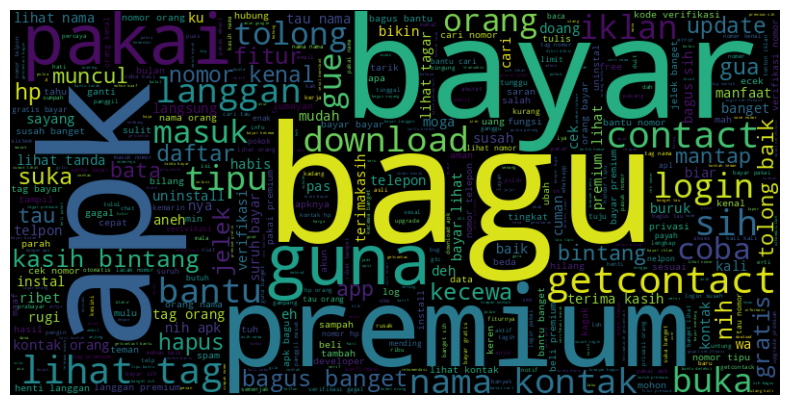

In [26]:
# Membuat wordcloud
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Mengisi nilai NaN dengan string kosong ('')
df['steming_data'] = df['steming_data'].fillna('')

# Menggabungkan teks dari kolom 'Review Text'
text = ' '.join(df['steming_data'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['ya', 'kayak', 'aplikasi'])

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Save Dataset

In [42]:
data = df['steming_data']
data.head()

,steming_data
0,henti langgan aplikasi mudah henti langgan gan...
1,bantu fitur free ya batas lihat tag free user ...
2,duh sayang banget fiturnya premium aplikasi ba...
3,sayang banget bayar premium bulan kayak nikmat...
4,bantu aplikasi ganti hp instal aplikasi ya daf...


In [43]:
data.to_csv('preprocessed_data.csv', encoding='utf8', index=False)

# Labelling Data


In [44]:
import pandas as pd

data = pd.read_csv('/content/preprocessed_data.csv')
data.head()

,steming_data
0,henti langgan aplikasi mudah henti langgan gan...
1,bantu fitur free ya batas lihat tag free user ...
2,duh sayang banget fiturnya premium aplikasi ba...
3,sayang banget bayar premium bulan kayak nikmat...
4,bantu aplikasi ganti hp instal aplikasi ya daf...


In [45]:
data = data.dropna()

In [48]:
import random

# Download positive and negative lexicon from given URL
positive_lexicon = set(pd.read_csv("/content/sentiment-getcontact/data/positive.tsv", sep="\t", header=None)[0])
negative_lexicon = set(pd.read_csv("/content/sentiment-getcontact/data/negative.tsv", sep="\t", header=None)[0])

# Function to determine sentiment and calculate its score
def determine_sentiment(text):
    if isinstance(text, str):
        # Count positive and negative words
        positive_count = sum(1 for word in text.split() if word in positive_lexicon)
        negative_count = sum(1 for word in text.split() if word in negative_lexicon)
        sentiment_score = positive_count - negative_count

        # If score is 0, randomly assign positive or negative
        if sentiment_score == 0:
            sentiment_score = random.choice([1, -1])

        # Determine sentiment based on score
        if sentiment_score > 0:
            sentiment = "Positif"
        else:
            sentiment = "Negatif"

        return sentiment_score, sentiment

    return 0, "Netral"

# Determine sentiment and score for each review
data[['Score', 'Sentiment']] = data['steming_data'].apply(lambda x: pd.Series(determine_sentiment(x)))

data.sample(3)

,steming_data,Score,Sentiment
48973,tipu notif getcontact tipu angkat,1,Positif
44933,ulang kali masuk gagal,-2,Negatif
15691,niat install cari tau nomer telpon eh tau prem...,-2,Negatif


<ipython-input-49-e9bc5a32b1b1>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


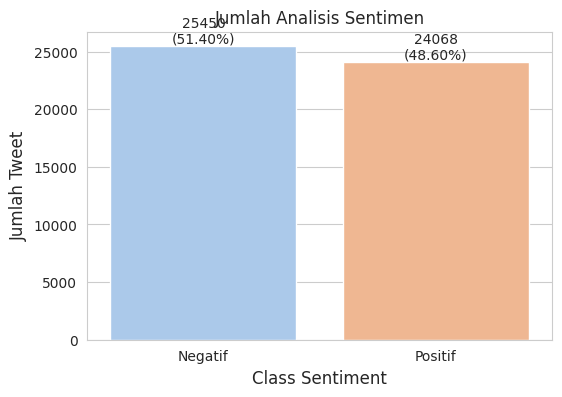

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each sentiment
sentiment_count = data['Sentiment'].value_counts()

# Set seaborn style
sns.set_style('whitegrid')

# Create the subplot
fig, ax = plt.subplots(figsize=(6, 4))

# Create bar plot
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')

# Set title and labels
plt.title('Jumlah Analisis Sentimen', fontsize=12)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

# Calculate and add percentage labels
total = len(data['Sentiment'])
for i, count in enumerate(sentiment_count.values):
    percentage = f"{100 * count / total:.2f}%"
    ax.text(i, count + 0.19, f"{count}\n({percentage})", ha='center', va='bottom')

# Display the plot
plt.show()

In [50]:
data.to_csv('labelling_data.csv', encoding='utf8', index=False)

# Feature Extraction from Text

In [65]:
import pandas as pd

data = pd.read_csv('/content/labelling_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49518 entries, 0 to 49517
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   steming_data  49518 non-null  object
 1   Score         49518 non-null  int64 
 2   Sentiment     49518 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Memisahkan fitur (X) dan target (y)
X = data["steming_data"]  # Teks ulasan
y = data["Sentiment"]     # Label sentimen

# Membagi dataset menjadi training dan testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction menggunakan Bag of Words (BoW)
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

# Feature extraction menggunakan TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Menampilkan bentuk matriks hasil transformasi
X_train_bow.shape, X_train_tfidf.shape

((39614, 21254), (39614, 21254))

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Inisialisasi model Logistic Regression
model_bow = LogisticRegression(max_iter=1000)
model_tfidf = LogisticRegression(max_iter=1000)

# Melatih model dengan BoW
model_bow.fit(X_train_bow, y_train)
y_pred_bow = model_bow.predict(X_test_bow)

# Melatih model dengan TF-IDF
model_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

# Menghitung akurasi
accuracy_bow = accuracy_score(y_test, y_pred_bow)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

accuracy_bow, accuracy_tfidf

(0.8548061389337641, 0.8593497576736672)

In [71]:
# Menghitung confusion matrix
conf_matrix_bow = confusion_matrix(y_test, y_pred_bow)
conf_matrix_tfidf = confusion_matrix(y_test, y_pred_tfidf)

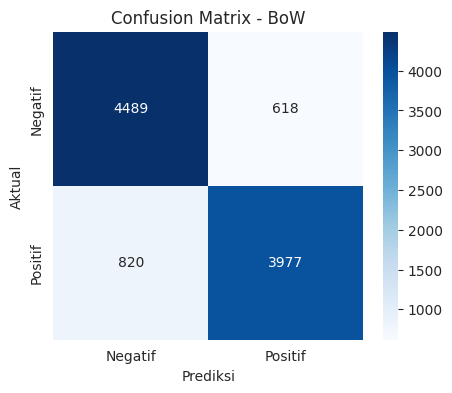

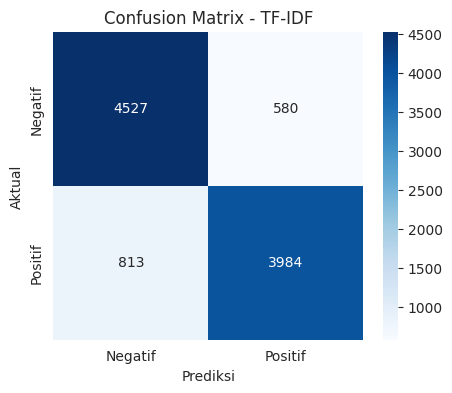

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk menampilkan confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negatif", "Positif"], yticklabels=["Negatif", "Positif"])
    plt.xlabel("Prediksi")
    plt.ylabel("Aktual")
    plt.title(title)
    plt.show()

# Menampilkan confusion matrix untuk BoW
plot_confusion_matrix(conf_matrix_bow, "Confusion Matrix - BoW")

# Menampilkan confusion matrix untuk TF-IDF
plot_confusion_matrix(conf_matrix_tfidf, "Confusion Matrix - TF-IDF")

# Prediksi

In [75]:
# Contoh teks untuk prediksi
sample_texts = [
    "mudah digunakan dan sangat bermanfaat untuk saya",
    "tidak bisa login setelah update, sangat mengecewakan"
]

# Transformasi teks dengan BoW dan TF-IDF
sample_bow = bow_vectorizer.transform(sample_texts)
sample_tfidf = tfidf_vectorizer.transform(sample_texts)

# Prediksi dengan model BoW dan TF-IDF
pred_bow = model_bow.predict(sample_bow)
pred_tfidf = model_tfidf.predict(sample_tfidf)

# Menampilkan hasil prediksi
prediction_results = pd.DataFrame({
    "Text": sample_texts,
    "Prediction_BoW": pred_bow,
    "Prediction_TFIDF": pred_tfidf
})

prediction_results

,Text,Prediction_BoW,Prediction_TFIDF
0,mudah digunakan dan sangat bermanfaat untuk saya,Negatif,Negatif
1,"tidak bisa login setelah update, sangat mengec...",Negatif,Negatif
